# 1

In [ ]:
Q = [1   -1/2   1
     -1/2   3  -3
     1     -3   1]
v = [x
     y
     z]


In [5]:
(L,U) = eig(Q) # L is the vector of eigenvalues and U is orthogonal 
U * diagm(L) * U' # this is equal to Q (as long as Q was symmetric to begin wi th)

L


3-element Array{Float64,1}:
 -1.28831 
  0.900407
  5.3879  

L is semidefinit and Q>=0 (PSD). the point set x fulfills x'*Q*x <= b is not an ellipsoid
not convex

In [ ]:
A'*A-B'*B = Q


In [ ]:
we can calculate
Q*v = (-1.28831)*v
with the negative eigen vector
since the shape of the ellipsoid will change on side of the negative vector

after we find the v
we can mutiply any scalar to v
a*v then could be a vector that x^2+y^2+z^2 be unbounded

# 2

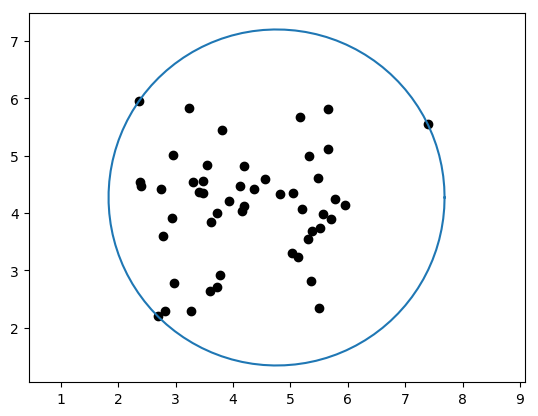

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      500
Number of nonzeros in Lagrangian Hessian.............:      150

Total number of variables............................:        3
                     variables with only lower bounds:        1
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       50
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       50

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 9

In [16]:
using PyPlot, JuMP, Ipopt 
X = 4 + randn(2,50) # generate 50 random points 

m = Model(solver = IpoptSolver())
@variable(m, r>=0)
@variable(m, x)
@variable(m, y)

@objective(m, Min, r)

for i = 1:50
    @constraint(m, (x-X[1,i])^2 + (y-X[2,i])^2 <=r*r)
end

solve(m)

println("x:",getvalue(x))
println("y:",getvalue(y))
println("r:",getvalue(r))


a = getvalue(x)
b = getvalue(y)
c = getvalue(r)
scatter( X[1,:], X[2,:], color="black") # plot the 50 points 
t = linspace(0,2pi,100) # parameter that traverses the circle 
plot( a + c*cos.(t), b + c*sin.(t)) # plot circle radius r with center (x1,x2) 

axis("equal"); # make x and y scales equal

In [ ]:
x, y, r are above

# 3

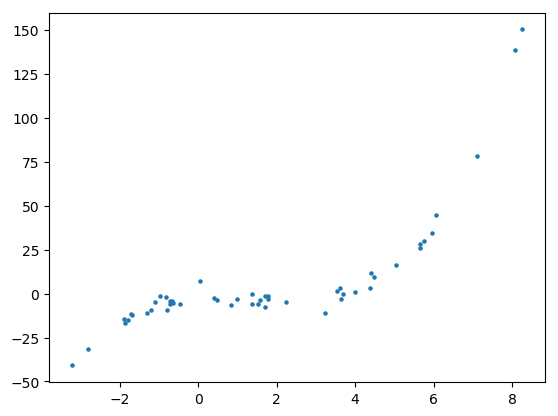

In [7]:
using PyPlot 
using Distributions 
using JuMP, Gurobi
x = 2 - 3 * rand(Normal(0, 1),50) 
y = x .- 2 .* (x.^2) + 0.5 .* (x.^3) + rand(Normal(-3, 3),50) 

scatter(x,y,s=5);

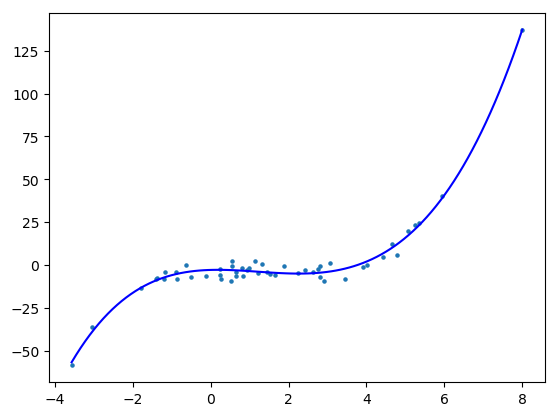

a:[0.00111961, -0.0148533, 0.542487, -1.85755, 0.622698, -2.92403]


In [16]:
k = 5
n = 50
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

a = A\y

scatter(x,y,s=5);

npts = 100
xfine = linspace(minimum(x),maximum(x),npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * a

plot( xfine, yfine, "b-")

println("a:", a)

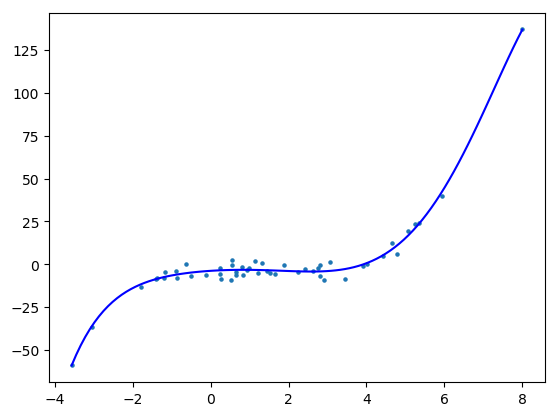

a:[-4.92041e-6, -0.00219099, 0.028725, -0.0575254, 0.140377, -1.00127, 1.45428, -3.8669]


In [17]:
k = 7
n = 50
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

a = A\y

scatter(x,y,s=5);

npts = 100
xfine = linspace(minimum(x),maximum(x),npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * a

plot( xfine, yfine, "b-")

println("a:", a)

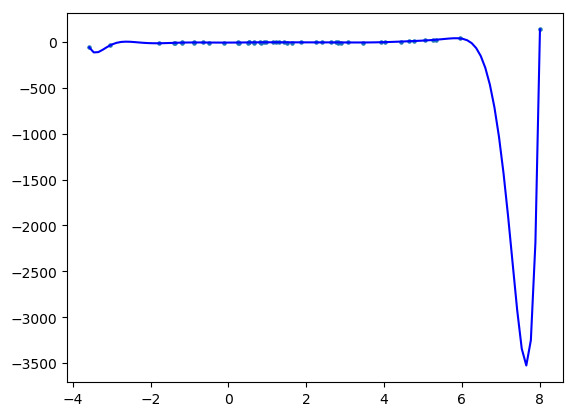

a:[2.82528e-6, -7.16279e-5, 0.0006067, -0.000991419, -0.0130795, 0.0639187, 0.022508, -0.670179, 0.810693, 2.30731, -4.501, -2.07556, 5.802, 1.45609, -5.88987]


In [15]:
k = 14
n = 50
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

a = A\y

scatter(x,y,s=5);

npts = 100
xfine = linspace(minimum(x),maximum(x),npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * a

plot( xfine, yfine, "b-")

println("a:", a)


(1)
the coefficients are small , sparse

Academic license - for non-commercial use only
a:[5.68705e-5, -0.000541442, -0.00388025, 0.0475581, 0.48094, -2.71221, 1.96527, -1.60098]
[5.68716e-5, 0.000541442, 0.00388025, 0.0475581, 0.48094, 2.71221, 1.96527, 1.60098]
462.5038308600747
6.81142785127194
469.31525871134664


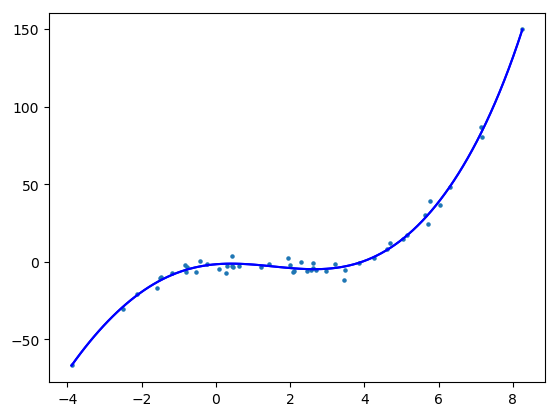

Academic license - for non-commercial use only
a:[6.24532e-5, -0.000636856, -0.00353097, 0.0491321, 0.471426, -2.71305, 2.00764, -1.62437]
462.47461929764034


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000000118A978>

In [102]:


k = 7
m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, a[1:k+1])
@variable(m, b[1:k+1])

# order of polynomial to use

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = 50
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end
@constraint(m, aa[i =1:k+1], b[i] >=a[i])
@constraint(m, bb[i =1:k+1], b[i] >=-a[i])
@objective(m, Min, sum( (y - A*a).^2 ) + sum(b))
status = solve(m)
opt = getvalue(a)

println("a:", getvalue(a))
t = getvalue(sum( (y - A*a).^2 ))
s = getvalue(sum(b))
println(getvalue(b))
println(t)
println(s)
println(t + s)


scatter(x,y,s=5);

npts = 100
xfine = linspace(minimum(x),maximum(x),npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * opt

plot( xfine, yfine, "b-")




(2)
Lasso
Sparsifying
the magnitude becomes smaller

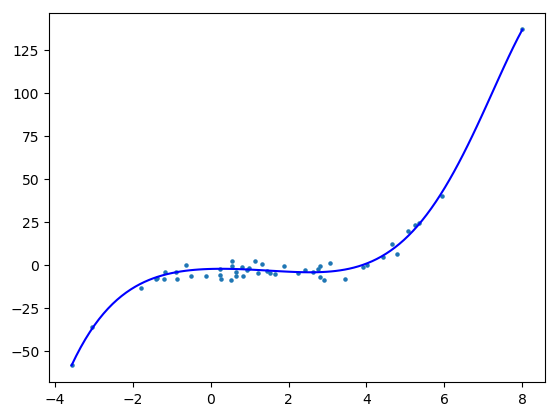

Academic license - for non-commercial use only
a:[-0.000122936, 8.2355e-5, 0.0166031, -0.0686131, 0.374413, -1.31999, 0.62494, -2.46533]
455.00945028465964


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002230B00>

In [20]:

k = 7
m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, a[1:k+1])

# order of polynomial to use

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = 50
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

@objective(m, Min, sum( (y - A*a).^2 ) + 10*sum(a[i]^2 for i = 1:k+1))
status = solve(m)
opt = getvalue(a)

println("a:", getvalue(a))
t = getvalue(sum( (y - A*a).^2 ))
println(t)



scatter(x,y,s=5);

npts = 100
xfine = linspace(minimum(x),maximum(x),npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * opt

plot( xfine, yfine, "b-")




(3)
smoothing  effect
the magnitude of the coefficient also become small